In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np



flights_path = 'flight_arrival.csv'
# Import the data into a Pandas DataFrame
flight_df = pd.read_csv(flights_path)
flight_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2009,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",243.0,56.0,25.61,4.13,...,0.00,14.60,8.0,0.0,2871.0,1130.0,275.0,563.0,0.0,903.0
1,2009,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",588.0,142.0,48.38,11.82,...,0.95,28.76,35.0,1.0,6669.0,2071.0,753.0,1953.0,40.0,1852.0
2,2009,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",776.0,129.0,31.36,18.48,...,0.00,48.23,23.0,0.0,7472.0,1693.0,1327.0,1385.0,0.0,3067.0
3,2009,1,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",150.0,30.0,11.94,2.00,...,0.00,12.55,6.0,1.0,1592.0,518.0,83.0,146.0,0.0,845.0
4,2009,1,AA,American Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",88.0,23.0,6.87,1.96,...,0.00,6.52,1.0,2.0,992.0,261.0,148.0,228.0,0.0,355.0


In [12]:
df = pd.DataFrame({
    "year":flight_df["year"],
    "month":flight_df[" month"],
    "carrier":flight_df["carrier"],
    "carrier_name":flight_df["carrier_name"],
    "airport":flight_df["airport"],
    "airport_name":flight_df["airport_name"],
    "arr_flights":flight_df["arr_flights"],
    "Flight_cancelled":flight_df["arr_cancelled"],
    "Flight_Diverted":flight_df["arr_diverted"],
    "Flight_Delay_>_15min":flight_df["arr_del15"]
})
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,Flight_cancelled,Flight_Diverted,Flight_Delay_>_15min
0,2009,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",243.0,8.0,0.0,56.0
1,2009,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",588.0,35.0,1.0,142.0
2,2009,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",776.0,23.0,0.0,129.0
3,2009,1,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",150.0,6.0,1.0,30.0
4,2009,1,AA,American Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",88.0,1.0,2.0,23.0


In [23]:
#Flights by Airline
#AA
AA_table = df.loc[df["carrier_name"]=="American Airlines Inc."]
AA_count = AA_table.groupby(["year"])["arr_flights"].sum()

#DL
DL_table = df.loc[df["carrier_name"]=="Delta Air Lines Inc."]
DL_count = DL_table.groupby(["year"])["arr_flights"].sum()

#B6
B6_table = df.loc[df["carrier_name"]=="JetBlue Airways"]
B6_count = B6_table.groupby(["year"])["arr_flights"].sum()

#WN
WN_table = df.loc[df["carrier_name"]=="Southwest Airlines Co."]
WN_count = WN_table.groupby(["year"])["arr_flights"].sum()

#UA
UA_table = df.loc[df["carrier_name"]=="United Air Lines Inc."]
UA_count = UA_table.groupby(["year"])["arr_flights"].sum()

arr_df = pd.DataFrame({"American Airlines Inc":AA_count,
                       "Delta Air Lines Inc.":DL_count,
                       "JetBlue Airways":B6_count,
                       "Southwest Airlines Co.":WN_count,
                       "United Air Lines Inc.":UA_count})
arr_df

,American Airlines Inc,Delta Air Lines Inc.,JetBlue Airways,Southwest Airlines Co.,United Air Lines Inc.
year,,,,,
2009,551597.0,428007.0,194336.0,1132278.0,377049.0
2010,540963.0,732973.0,201434.0,1124487.0,343081.0
2011,538179.0,732331.0,215970.0,1155717.0,311212.0
2012,525220.0,726879.0,229056.0,1140535.0,531245.0
2013,537891.0,754670.0,241777.0,1130704.0,505798.0
2014,537697.0,800375.0,249693.0,1174633.0,493528.0
2015,725984.0,875881.0,267048.0,1261855.0,515723.0
2016,914495.0,922746.0,282473.0,1299444.0,545067.0
2017,896348.0,923560.0,298654.0,1329444.0,584481.0


In [36]:
arr_df['year'] = arr_df.index
arr_df.index
arr_df

year = arr_df.iloc[:,5]

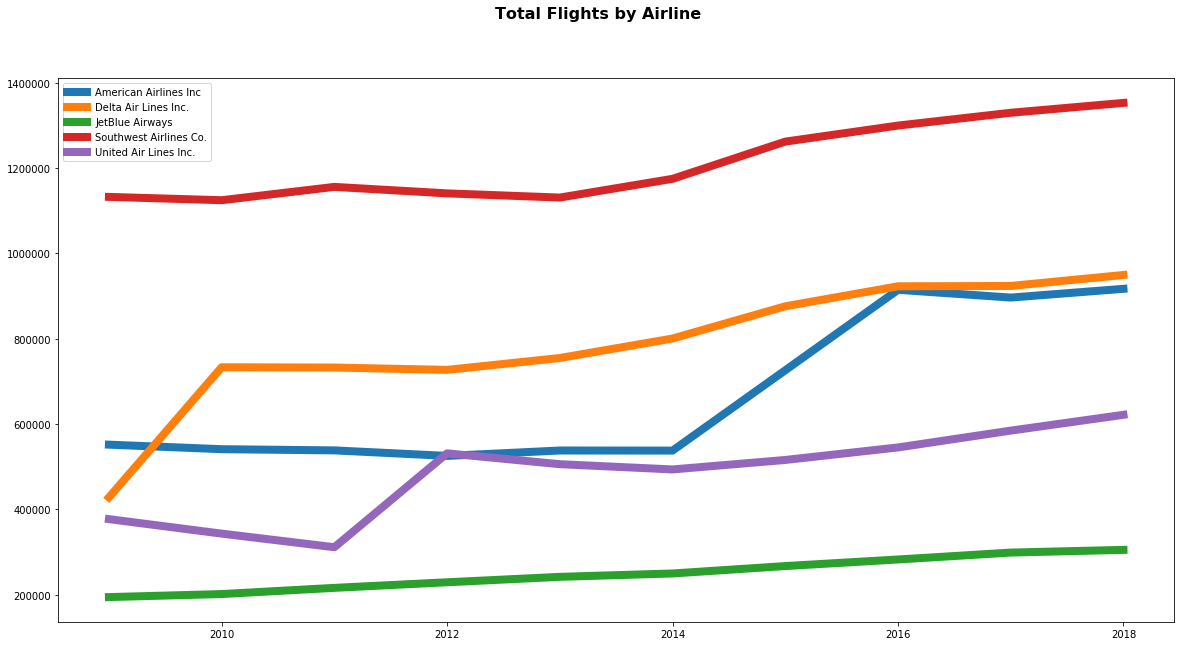

In [58]:
plt.figure(figsize=(20,10), linewidth=40) 


x = arr_df['year']
y_1 = arr_df["American Airlines Inc"]
y_2 = arr_df["Delta Air Lines Inc."]
y_3 = arr_df["JetBlue Airways"]
y_4 = arr_df["Southwest Airlines Co."]
y_5 = arr_df["United Air Lines Inc."]

plt.plot(x, y_1, linewidth=8)
plt.plot(x, y_2, linewidth=8)
plt.plot(x, y_3, linewidth=8)
plt.plot(x, y_4, linewidth=8)
plt.plot(x, y_5, linewidth=8)
plt.legend(loc='best')
plt.suptitle("Total Flights by Airline", fontsize=16, fontweight="bold" , )
plt.show()

In [34]:
arr_df['year'] = arr_df.index
arr_df.index
arr_df

year = arr_df.iloc[:,5]

In [13]:
#Cancellations by Airline
#AA
AA_table = df.loc[df["carrier_name"]=="American Airlines Inc."]
AA_count = AA_table.groupby(["year"])["Flight_cancelled"].sum()

#DL
DL_table = df.loc[df["carrier_name"]=="Delta Air Lines Inc."]
DL_count = DL_table.groupby(["year"])["Flight_cancelled"].sum()

#B6
B6_table = df.loc[df["carrier_name"]=="JetBlue Airways"]
B6_count = B6_table.groupby(["year"])["Flight_cancelled"].sum()

#WN
WN_table = df.loc[df["carrier_name"]=="Southwest Airlines Co."]
WN_count = WN_table.groupby(["year"])["Flight_cancelled"].sum()

#UA
UA_table = df.loc[df["carrier_name"]=="United Air Lines Inc."]
UA_count = UA_table.groupby(["year"])["Flight_cancelled"].sum()

dff = pd.DataFrame({"American Airlines Inc":AA_count,
                       "Delta Air Lines Inc.":DL_count,
                       "JetBlue Airways":B6_count,
                       "Southwest Airlines Co.":WN_count,
                       "United Air Lines Inc.":UA_count})
dff

,American Airlines Inc,Delta Air Lines Inc.,JetBlue Airways,Southwest Airlines Co.,United Air Lines Inc.
year,,,,,
2009,9248.0,4790.0,2617.0,8594.0,6378.0
2010,9146.0,14857.0,4116.0,11597.0,5010.0
2011,13527.0,10188.0,3895.0,12147.0,4880.0
2012,9569.0,3713.0,2387.0,9580.0,7599.0
2013,9749.0,2435.0,2013.0,8440.0,4920.0
2014,8457.0,6502.0,6076.0,15165.0,7330.0
2015,10919.0,3824.0,4276.0,16043.0,6573.0
2016,10867.0,4116.0,3797.0,15866.0,5470.0
2017,12138.0,8960.0,8288.0,18046.0,5959.0


In [20]:
dff['year'] = dff.index
dff.index
dff

year = dff.iloc[:,5]

Text(0, 0.5, 'United Airlines Cancellations')

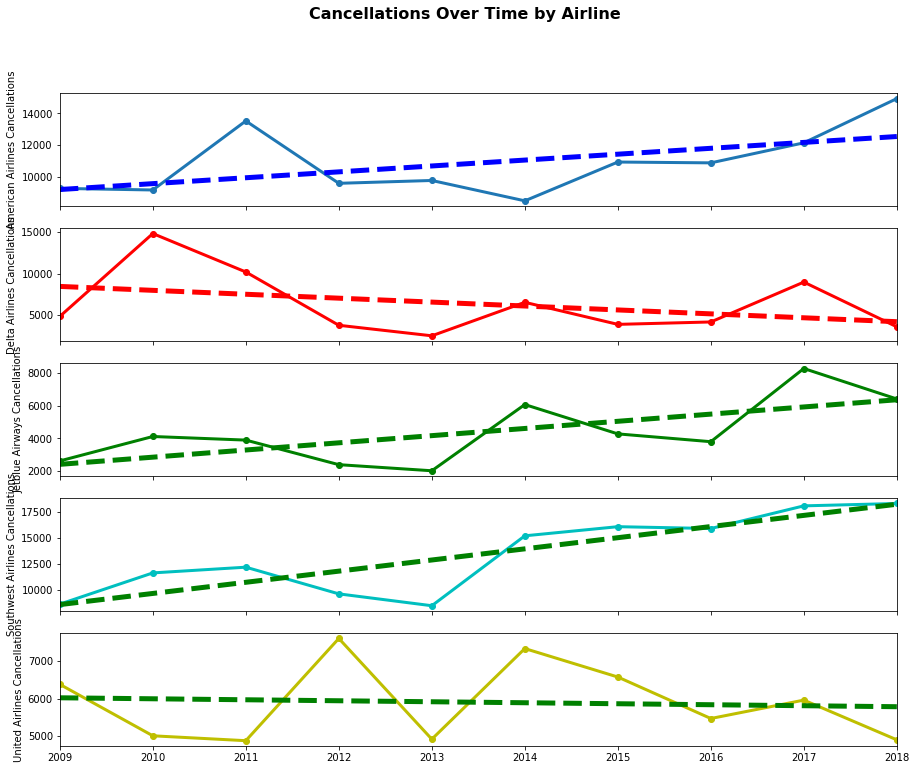

In [62]:
from scipy import stats
#2019 Cancellation Predictions
#AA 

aa_rate = dff.iloc[:, 0]
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    year, aa_rate)
aa_fit = aa_slope * year + aa_int


#DL

dl_rate = dff.iloc[:, 1]
dl_slope, dl_int, dl_r, dl_p, dl_std_err = stats.linregress(
    year, dl_rate)
dl_fit = dl_slope * year + dl_int

#B6

b6_rate = dff.iloc[:, 2]
b6_slope, b6_int, b6_r, b6_p, b6_std_err = stats.linregress(
    year, b6_rate)
b6_fit = b6_slope * year + b6_int

#WN

wn_rate = dff.iloc[:, 3]
wn_slope, wn_int, wn_r, wn_p, wn_std_err = stats.linregress(
    year, wn_rate)
wn_fit = wn_slope * year + wn_int

#UA

ua_rate = dff.iloc[:, 4]
ua_slope, ua_int, ua_r, ua_p, ua_std_err = stats.linregress(
    year, ua_rate)
ua_fit = ua_slope * year + ua_int

# Plot
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,figsize=(15,12), sharex=True)
fig.suptitle("Cancellations Over Time by Airline", fontsize=16, fontweight="bold" , )




ax1.set_xlim(min(year), max(year))
ax1.plot(year, aa_rate, linewidth=3, marker="o")
ax1.plot(year, aa_fit, "b--", linewidth=5)
ax1.set_ylabel("American Airlines Cancellations")


ax2.plot(year, dl_rate, linewidth=3, marker="o", color="r")
ax2.plot(year, dl_fit, "r--", linewidth=5)
ax2.set_ylabel("Delta Airlines Cancellations")

ax3.plot(year, b6_rate, linewidth=3, marker="o", color="g")
ax3.plot(year, b6_fit, "g--", linewidth=5)
ax3.set_ylabel("Jetblue Airways Cancellations")


ax4.plot(year, wn_rate, linewidth=3, marker="o", color="c")
ax4.plot(year, wn_fit, "g--", linewidth=5)
ax4.set_ylabel("Southwest Airlines Cancellations")

ax5.plot(year, ua_rate, linewidth=3, marker="o", color="y")
ax5.plot(year, ua_fit, "g--", linewidth=5)
ax5.set_ylabel("United Airlines Cancellations")

#ax5.set_xlabel(year)

In [22]:
# Print results for 2019
year = 2019
print("American Airlines cancellations in 2019 will be " +
     str(aa_slope * year + aa_int) + ".")
print("Delta Airlines cancellations in 2019 will be " + str(dl_slope * year + dl_int) + ".")
print("Jetblue Airways cancellations in 2019 will be " +
     str(b6_slope * year + b6_int) + ".")
print("Southwest Airlines cancellations in 2019 will be" +
     str(wn_slope * year + wn_int) + ".")
print("United Airlines cancellations in 2019 will be " +
     str(ua_slope * year + ua_int) + ".")

American Airlines cancellations in 2019 will be 12912.333333333256.
Delta Airlines cancellations in 2019 will be 3671.4000000000233.
Jetblue Airways cancellations in 2019 will be 6810.466666666674.
Southwest Airlines cancellations in 2019 will be19274.66666666651.
United Airlines cancellations in 2019 will be 5757.199999999997.


In [45]:
delay_df = pd.DataFrame({
    "year":flight_df["year"],
    "month":flight_df[" month"],
    "carrier":flight_df["carrier"],
    "carrier_name":flight_df["carrier_name"],
    "airport":flight_df["airport"],
    "airport_name":flight_df["airport_name"],
    "arr_diverted":flight_df["arr_diverted"],
    "arr_delay":flight_df[" arr_delay"],
    "carrier_delay":flight_df[" carrier_delay"],
    "weather_delay":flight_df["weather_delay"],
    "security_delay":flight_df["late_aircraft_delay"],
    "nas_delay":flight_df["nas_delay"],
    "late_aircraft_delay":flight_df["late_aircraft_delay"],
})
delay_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_diverted,arr_delay,carrier_delay,weather_delay,security_delay,nas_delay,late_aircraft_delay
0,2009,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",0.0,2871.0,1130.0,275.0,903.0,563.0,903.0
1,2009,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1.0,6669.0,2071.0,753.0,1852.0,1953.0,1852.0
2,2009,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",0.0,7472.0,1693.0,1327.0,3067.0,1385.0,3067.0
3,2009,1,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",1.0,1592.0,518.0,83.0,845.0,146.0,845.0
4,2009,1,AA,American Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",2.0,992.0,261.0,148.0,355.0,228.0,355.0


In [ ]:
#2019 Delay Predictions
#AA 

aa_rate = dff.iloc[:, 0]
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    year, aa_rate)
aa_fit = aa_slope * year + aa_int


#DL

dl_rate = dff.iloc[:, 1]
dl_slope, dl_int, dl_r, dl_p, dl_std_err = stats.linregress(
    year, dl_rate)
dl_fit = dl_slope * year + dl_int

#B6

b6_rate = dff.iloc[:, 2]
b6_slope, b6_int, b6_r, b6_p, b6_std_err = stats.linregress(
    year, b6_rate)
b6_fit = b6_slope * year + b6_int

#WN

wn_rate = dff.iloc[:, 3]
wn_slope, wn_int, wn_r, wn_p, wn_std_err = stats.linregress(
    year, wn_rate)
wn_fit = wn_slope * year + wn_int

#UA

ua_rate = dff.iloc[:, 4]
ua_slope, ua_int, ua_r, ua_p, ua_std_err = stats.linregress(
    year, ua_rate)
ua_fit = ua_slope * year + ua_int

# Plot
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,figsize=(15,12), sharex=True)
fig.suptitle("Cancellations Over Time by Airline", fontsize=16, fontweight="bold" , )




ax1.set_xlim(min(year), max(year))
ax1.plot(year, aa_rate, linewidth=1, marker="o")
ax1.plot(year, aa_fit, "b--", linewidth=1)
ax1.set_ylabel("American Airlines Cancellations")


ax2.plot(year, dl_rate, linewidth=1, marker="o", color="r")
ax2.plot(year, dl_fit, "r--", linewidth=1)
ax2.set_ylabel("Delta Airlines Cancellations")

ax3.plot(year, b6_rate, linewidth=1, marker="o", color="g")
ax3.plot(year, b6_fit, "g--", linewidth=1)
ax3.set_ylabel("Jetblue Airways Cancellations")


ax4.plot(year, wn_rate, linewidth=1, marker="o", color="c")
ax4.plot(year, wn_fit, "g--", linewidth=1)
ax4.set_ylabel("Southwest Airlines Cancellations")

ax5.plot(year, ua_rate, linewidth=1, marker="o", color="y")
ax5.plot(year, ua_fit, "g--", linewidth=3)
ax5.set_ylabel("United Airlines Cancellations")
ax5.set_xlabel(year)